In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import cv2
from time import time
import matplotlib.pyplot as plt
import matplotlib
from keras.callbacks import TensorBoard
import os
from keras.optimizers import SGD
from os import listdir
from os.path import join, basename
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img, img_to_array
from keras.regularizers import l2
from keras import regularizers


Using TensorFlow backend.


#Turning images to greyscale proved detrimental to the classification of the model, hence did not use it. 

In [0]:
dirc='/gdrive/My Drive/Final Project/DermCNN data/'
labels=[]
data=[]
im_width=150
im_height=150

In [0]:
for i in range(7):
    path=os.getcwd()+dirc+str(i+1)+'/'
    print(path)
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    for file_name in image_files:
        image_file = str(path + file_name)
        img = cv2.imread(image_file)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
        labels.append(int(path[-2])-1)
        if progress%100==0:
            print('Progress '+str(progress)+' Images :'  + path[-2])

In [0]:
data=np.array(data)
print(data.shape)
# data=data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],3)
print(data.shape)
labels=np.array(labels)
print(labels.shape)
print(len(labels))
print(labels)
# labels.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)

11355
11355
(11355, 150, 150, 3)
(11355,)


In [0]:
data = data.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)
print(labels.shape)

(11355, 7)


#Shuffling Data


In [0]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [0]:
for i in range(10):
    shuffle(data,labels)

#Importing Resnet through keras applications on my custom image size, and with pre-trained weights on imagenet

In [0]:
model = keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


#Training my network on all the layers of ResNet except first five. (Gave me the best results)

In [0]:
for layer in model.layers[:-10]:
    layer.trainable = False

#Colab kept on disconnecting on higher epochs otherwise I would have posted the results on them as well.

In [0]:
x = model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
x = Dense(100,activation="relu")(x)
x = Dropout(0.8)(x)
x = Dense(7,activation='softmax')(x)

 
model_final = Model(input = model.input, output = x)
model_final.compile(keras.optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_final.summary()

history = model_final.fit(data,labels,
          batch_size=32,
          epochs=50,
          verbose=1,
          shuffle=True,
          validation_split=0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

#Model accuracy and loss plotted

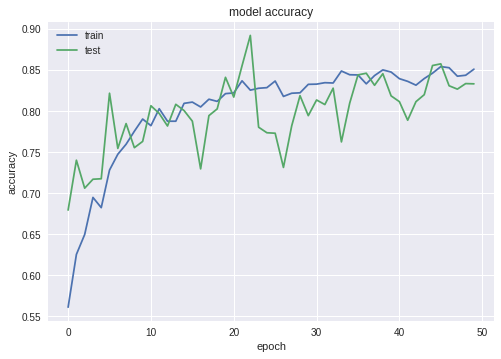

Text(0,0.5,'loss')

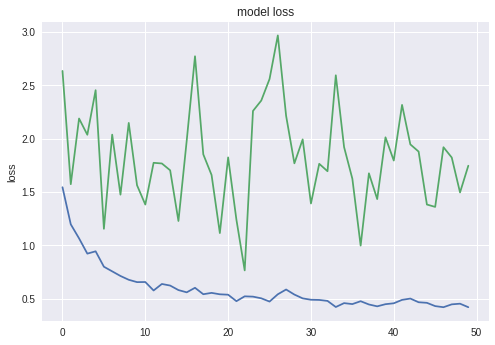

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')